In [7]:
from matplotlib.colors import ListedColormap

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set') 

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler().fit(X)

# Caricamento dei dati in un dataframe di Pandas
df = pd.read_csv("database_2015-2023_v4.csv")

# Creazione delle variabili esplicative e della variabile risposta
X = df[["last5_home_scored", "last5_away_scored", "last5_home_conceded", "last5_away_conceded","home_team_pos","away_team_pos","home_value","away_value","home_last_points","away_last_points"]].values
X = scaler.fit_transform(X)
#X = df_train.values
y = df["FTR"].values

# Conversione della variabile risposta in un formato adatto per la regressione multinomiale
y = pd.Categorical(y).codes

# Divisione dei dati in un insieme di addestramento e uno di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creazione del modello di regressione multinomiale
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=1)

# from sklearn.preprocessing import MinMaxScaler

# mms = MinMaxScaler()
# X_train = mms.fit_transform(X_train)
# X_test = mms.transform(X_test)

# Addestramento del modello sui dati di addestramento
model.fit(X_train, y_train)

X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# plot_decision_regions(X_combined_std, y_combined,
#                       classifier=model, test_idx=range(105, 150))
# plt.xlabel('petal length [standardized]')
# plt.ylabel('petal width [standardized]')
# plt.legend(loc='upper left')
# plt.tight_layout()
# # plt.savefig('images/03_06.png', dpi=300)
# plt.show()

In [2]:
print('Training accuracy: %.3f' % model.score(X_train, y_train))
print('Test accuracy: %.3f' % model.score(X_test, y_test))

Training accuracy: 0.681
Test accuracy: 0.687


In [3]:
y_pred = model.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 177


In [4]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.687


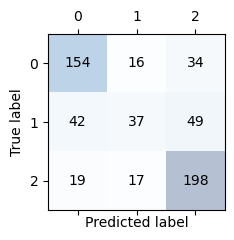

In [5]:
#mostriamo confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

 1) home_last_points               0.165565
 2) away_last_points               0.154453
 3) away_value                     0.113989
 4) home_value                     0.098577
 5) home_team_pos                  0.087805
 6) last5_home_scored              0.076620
 7) last5_away_conceded            0.076437
 8) away_team_pos                  0.076141
 9) last5_home_conceded            0.075495
10) last5_away_scored              0.074917


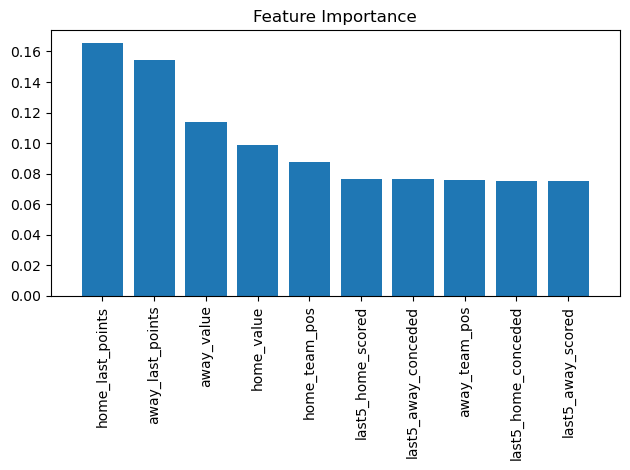

In [10]:
#Calcoliamo features importance
from sklearn.ensemble import RandomForestClassifier

df = df[["last5_home_scored", "last5_away_scored", "last5_home_conceded", "last5_away_conceded","home_team_pos","away_team_pos","home_value","away_value","home_last_points","away_last_points"]]

feat_labels = df.columns[:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [77]:
import pandas as pd
import numpy as np

df = pd.read_csv("database_2015-2023.csv")
df = df.loc[::-1].reset_index(drop=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df['Date']= pd.to_datetime(df['Date'])
df = df[["Date","HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR"]]
df

C:\Users\david\anaconda3\envs\notebook\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\david\anaconda3\envs\notebook\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\david\anaconda3\envs\notebook\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\david\anaconda3\envs\notebook\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,2023-01-16,Empoli,Sampdoria,1,0,H
1,2023-01-15,Roma,Fiorentina,2,0,H
2,2023-01-15,Atalanta,Salernitana,8,2,H
3,2023-01-15,Udinese,Bologna,1,2,A
4,2023-01-15,Torino,Spezia,0,1,A
...,...,...,...,...,...,...
2825,2015-08-23,Frosinone,Torino,1,2,A
2826,2015-08-23,Fiorentina,Milan,2,0,H
2827,2015-08-23,Empoli,Chievo,1,3,A
2828,2015-08-22,Verona,Roma,1,1,D


In [78]:
df["last5_home_scored"] = 0
df["last5_away_scored"] = 0
df["last5_home_conceded"] = 0
df["last5_away_conceded"] = 0

In [79]:
def homeTeam_last5_goals_scored(index):
    somma = 0
    x = 0
    t = 0
    while (x != 5):
        if(index+t > len(df)-1): break
        if(df.iloc[index+t].HomeTeam == df.iloc[index].HomeTeam):
            somma += df.iloc[index+t].FTHG
            x += 1
        elif(df.iloc[index+t].AwayTeam == df.iloc[index].HomeTeam):
            somma += df.iloc[index+t].FTAG
            x += 1
        t += 1
            
    return somma

def awayTeam_last5_goals_scored(index):
    somma = 0
    x = 0
    t = 0
    while (x != 5):
        if(index+t > len(df)-1): break
        if(df.iloc[index+t].HomeTeam == df.iloc[index].AwayTeam):
            somma += df.iloc[index+t].FTHG
            x += 1
        elif(df.iloc[index+t].AwayTeam == df.iloc[index].AwayTeam):
            somma += df.iloc[index+t].FTAG
            x += 1
        t += 1
    return somma

def homeTeam_last5_goals_conceded(index):
    somma = 0
    x = 0
    t = 0
    while (x != 5):
        if(index+t > len(df)-1): break
        if(df.iloc[index+t].HomeTeam == df.iloc[index].HomeTeam):
            somma += df.iloc[index+t].FTAG
            x += 1
        elif(df.iloc[index+t].AwayTeam == df.iloc[index].HomeTeam):
            somma += df.iloc[index+t].FTHG
            x += 1
        t += 1
            
    return somma

def awayTeam_last5_goals_conceded(index):
    somma = 0
    x = 0
    t = 0
    while (x != 5):
        if(index+t > len(df)-1): break
        if(df.iloc[index+t].HomeTeam == df.iloc[index].AwayTeam):
            somma += df.iloc[index+t].FTAG
            x += 1
        elif(df.iloc[index+t].AwayTeam == df.iloc[index].AwayTeam):
            somma += df.iloc[index+t].FTHG
            x += 1
        t += 1
    return somma

In [80]:
for row in df.index:
    df.iat[row, 6] = homeTeam_last5_goals_scored(row)
    df.iat[row, 7] = awayTeam_last5_goals_scored(row)
    df.iat[row, 8] = homeTeam_last5_goals_conceded(row)
    df.iat[row, 9] = awayTeam_last5_goals_conceded(row)
    
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,last5_home_scored,last5_away_scored,last5_home_conceded,last5_away_conceded
0,2023-01-16,Empoli,Sampdoria,1,0,H,6,2,5,8
1,2023-01-15,Roma,Fiorentina,2,0,H,7,6,4,7
2,2023-01-15,Atalanta,Salernitana,8,2,H,15,5,10,16
3,2023-01-15,Udinese,Bologna,1,2,A,5,7,8,10
4,2023-01-15,Torino,Spezia,0,1,A,5,6,4,4
...,...,...,...,...,...,...,...,...,...,...
2825,2015-08-23,Frosinone,Torino,1,2,A,1,2,2,1
2826,2015-08-23,Fiorentina,Milan,2,0,H,2,0,0,2
2827,2015-08-23,Empoli,Chievo,1,3,A,1,3,3,1
2828,2015-08-22,Verona,Roma,1,1,D,1,1,1,1


In [175]:
import requests
from bs4 import BeautifulSoup

#calcola posizione in classifica
def get_table_pos(anno, giornata, team):
    page = "https://www.transfermarkt.com/serie-a/formtabelle/wettbewerb/IT1?saison_id="+anno+"&min=1&max="+giornata
    headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
    pageTree = requests.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

    #i nomi dei giocatori sono un link (tag a) con classe hide-for-small
    Classifica = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})

    #crea dataframe con giocatore e valore per una squadra
    ClasificaList = []

    for i in range(0,len(Classifica)):
        if(Classifica[i].text != ""):
            ClasificaList.append(Classifica[i].text)

    ClasificaList = list(filter(lambda x: len(x) > 0, ClasificaList))
    
    dct = {'\nSSC Napoli ':'Napoli', '\nInter  ':'Inter','\nAS Roma  ':'Roma','\nLazio ':'Lazio','\nAtalanta BC ':'Atalanta','\nJuventus ':'Juventus','\nAC Milan  ':'Milan','\nTorino ':'Torino','\nUdinese Calcio ':'Udinese','\nBologna ':'Bologna','\nMonza \xa0 ':'Monza','\nFC Empoli ':'Empoli','\nFiorentina ':'Fiorentina','\nLecce \xa0 ':'Lecce','\nSassuolo ':'Sassuolo','\nSalernitana ':'Salernitana','\nSpezia Calcio ':'Spezia','\nHellas Verona ':'Verona','\nSampdoria ':'Sampdoria','\nCremonese \xa0 ':'Cremonese','\nAC Milan ':'Milan','\nAS Roma ':'Roma','\nJuventus  ':'Juventus','\nCagliari Calcio ':'Cagliari','\nSalernitana \xa0 ':'Salernitana','\nFC Empoli \xa0 ':'Empoli','\nVenezia \xa0 ':'Venezia','\nGenoa ':'Genoa','\nInter ':'Inter','\nSSC Napoli  ':'Napoli','\nSpezia Calcio \xa0 ':'Spezia','\nParma ':'Parma','\nBenevento \xa0 ':'Benevento','\nCrotone \xa0 ':'Crotone','\nLazio  ':'Lazio','\nBrescia \xa0 ':'Brescia','\nHellas Verona \xa0 ':'Verona','\nSPAL ':'Spal','\nEmpoli \xa0 ':'Empoli','\nParma \xa0 ':'Parma','\nChievo Verona ':'Chievo','\nFrosinone \xa0 ':'Frosinone','\nSPAL \xa0 ':'Spal','\nCrotone ':'Crotone','\nPescara \xa0 ':'Pescara','\nEmpoli ':'Empoli','\nUS Palermo ':'Palermo','\nCagliari Calcio \xa0 ':'Cagliari','\nBologna \xa0 ':'Bologna','\nCarpi \xa0 ':'Carpi'}
    ClasificaList = [dct[k] for k in ClasificaList]

    return ClasificaList.index(team) +1

In [83]:
df_temp = pd.read_csv("database_2015-2023_prove.csv")
df_temp = df_temp.loc[::-1].reset_index(drop=True)
df_temp.dropna(inplace=True) 
df_temp.reset_index(drop=True, inplace=True)
df_temp

,Div,Giornata,Anno,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,I1,18.0,2022.0,16/01/2023,Empoli,Sampdoria,1.0,0.0,H,0.0,...,3.79,2.25,3.0,3.50,2.15,2.90,3.40,2.14,3.29,3.97
1,I1,18.0,2022.0,15/01/2023,Roma,Fiorentina,2.0,0.0,H,1.0,...,3.98,2.00,3.4,3.70,1.91,3.13,3.90,2.14,3.31,3.94
2,I1,18.0,2022.0,15/01/2023,Atalanta,Salernitana,8.0,2.0,H,5.0,...,8.04,1.40,4.6,8.00,1.30,4.75,8.50,1.34,5.53,10.15
3,I1,18.0,2022.0,15/01/2023,Udinese,Bologna,1.0,2.0,A,1.0,...,4.34,1.95,3.5,3.80,1.87,3.20,3.90,1.93,3.52,4.52
4,I1,18.0,2022.0,15/01/2023,Torino,Spezia,0.0,1.0,A,0.0,...,5.96,1.65,3.7,5.50,1.57,3.40,5.75,1.74,3.68,5.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,I1,1.0,2015.0,23/08/2015,Frosinone,Torino,1.0,2.0,A,1.0,...,2.20,3.40,3.1,2.25,3.75,3.13,2.25,3.77,3.44,2.16
2826,I1,1.0,2015.0,23/08/2015,Fiorentina,Milan,2.0,0.0,H,1.0,...,3.66,2.20,3.1,3.50,2.15,3.40,3.75,2.31,3.35,3.47
2827,I1,1.0,2015.0,23/08/2015,Empoli,Chievo,1.0,3.0,A,1.0,...,3.83,2.20,3.1,3.50,2.20,3.13,4.00,2.34,3.31,3.45
2828,I1,1.0,2015.0,22/08/2015,Verona,Roma,1.0,1.0,D,0.0,...,1.74,5.00,3.5,1.73,5.50,3.70,1.75,5.68,3.85,1.71


In [84]:

df["Giornata"] = df_temp["Giornata"].values
df["Anno"] = df_temp["Anno"].values
df["Giornata"] = df["Giornata"].astype(int)
df["Anno"] = df["Anno"].astype(int)
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,last5_home_scored,last5_away_scored,last5_home_conceded,last5_away_conceded,Giornata,Anno
0,2023-01-16,Empoli,Sampdoria,1,0,H,6,2,5,8,18,2022
1,2023-01-15,Roma,Fiorentina,2,0,H,7,6,4,7,18,2022
2,2023-01-15,Atalanta,Salernitana,8,2,H,15,5,10,16,18,2022
3,2023-01-15,Udinese,Bologna,1,2,A,5,7,8,10,18,2022
4,2023-01-15,Torino,Spezia,0,1,A,5,6,4,4,18,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
2825,2015-08-23,Frosinone,Torino,1,2,A,1,2,2,1,1,2015
2826,2015-08-23,Fiorentina,Milan,2,0,H,2,0,0,2,1,2015
2827,2015-08-23,Empoli,Chievo,1,3,A,1,3,3,1,1,2015
2828,2015-08-22,Verona,Roma,1,1,D,1,1,1,1,1,2015


In [176]:
df["home_team_pos"] = 0
df["away_team_pos"] = 0
for row in df.index:
    df.iat[row, 12] = get_table_pos(str(df.iloc[row].Anno), str(df.iloc[row].Giornata), str(df.iloc[row].HomeTeam))
    df.iat[row, 13] = get_table_pos(str(df.iloc[row].Anno), str(df.iloc[row].Giornata), str(df.iloc[row].AwayTeam))
    
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,last5_home_scored,last5_away_scored,last5_home_conceded,last5_away_conceded,Giornata,Anno,home_team_pos,away_team_pos
0,2023-01-16,Empoli,Sampdoria,1,0,H,6,2,5,8,14,19,0,0
1,2023-01-15,Roma,Fiorentina,2,0,H,7,6,4,7,3,9,0,0
2,2023-01-15,Atalanta,Salernitana,8,2,H,15,5,10,16,4,10,0,0
3,2023-01-15,Udinese,Bologna,1,2,A,5,7,8,10,15,11,0,0
4,2023-01-15,Torino,Spezia,0,1,A,5,6,4,4,10,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,2015-08-23,Frosinone,Torino,1,2,A,1,2,2,1,14,8,0,0
2826,2015-08-23,Fiorentina,Milan,2,0,H,2,0,0,2,3,12,0,0
2827,2015-08-23,Empoli,Chievo,1,3,A,1,3,3,1,18,12,0,0
2828,2015-08-22,Verona,Roma,1,1,D,1,1,1,1,11,3,0,0


In [183]:
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,last5_home_scored,last5_away_scored,last5_home_conceded,last5_away_conceded,home_team_pos,away_team_pos
0,2023-01-16,Empoli,Sampdoria,1,0,H,6,2,5,8,14,19
1,2023-01-15,Roma,Fiorentina,2,0,H,7,6,4,7,3,9
2,2023-01-15,Atalanta,Salernitana,8,2,H,15,5,10,16,4,10
3,2023-01-15,Udinese,Bologna,1,2,A,5,7,8,10,15,11
4,2023-01-15,Torino,Spezia,0,1,A,5,6,4,4,10,15
...,...,...,...,...,...,...,...,...,...,...,...,...
2825,2015-08-23,Frosinone,Torino,1,2,A,1,2,2,1,14,8
2826,2015-08-23,Fiorentina,Milan,2,0,H,2,0,0,2,3,12
2827,2015-08-23,Empoli,Chievo,1,3,A,1,3,3,1,18,12
2828,2015-08-22,Verona,Roma,1,1,D,1,1,1,1,11,3


In [89]:
prova = np.array( [-1,-1,-1,-1,-1])

prova = prova.reshape(1, -1)

print(model.predict(prova))
print("0 = Away, 1 = Draw, 2 = Home")
print(model.predict_proba(prova))
print("Formato = [[Away , Draw , Home]]")
result = model.predict_proba(prova)
prob_away = result[0][0]
prob_draw = result[0][1]
prob_home = result[0][2]
quota_away = 1 / prob_away
quota_draw = 1 / prob_draw
quota_home = 1 / prob_home
print(quota_away, quota_draw, quota_home)

[1]
0 = Away, 1 = Draw, 2 = Home
[[0.1887605  0.70747884 0.10376066]]
Formato = [[Away , Draw , Home]]
5.297718586061059 1.4134698338360157 9.63756392952842


In [210]:
print(y[:10])
print(df["FTR"].head(10))

[2 2 2 0 0 0 2 1 0 2]
0    H
1    H
2    H
3    A
4    A
5    A
6    H
7    D
8    A
9    H
Name: FTR, dtype: object


# Proviamo ora a inserire nel dataset il valore della squadra scesa in campo per ogni partita

In [142]:
import pandas as pd
df = pd.read_csv("database_2015-2023_v2.csv")
df.dropna(inplace=True) 
df.reset_index(drop=True, inplace=True)

In [151]:
import requests
from bs4 import BeautifulSoup

def get_teams_values(anno, home_team, away_team):
    if(home_team == "Spal"):
        home_team = "SPAL"
    if(away_team == "Spal"):
        away_team = "SPAL"
        
    page = "https://www.transfermarkt.it/serie-a/gesamtspielplan/wettbewerb/IT1?saison_id="+anno+"&spieltagVon=1&spieltagBis=38"
    headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
    pageTree = requests.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    
    ht = pageSoup.find_all("td",{"class":"text-right no-border-rechts hauptlink"})
    at = pageSoup.find_all("td",{"class":"no-border-links hauptlink"})
    link_box = pageSoup.find_all("td",{"class":"zentriert hauptlink"})
    
    ht_names = []
    at_names = []
    links = []
    link_partita = ""
    
    for hName in ht:
        ht_names.append(hName.find("a").text)
    for aName in at:
        at_names.append(aName.find("a").text)
    for Link in link_box:
        links.append("https://www.transfermarkt.it"+Link.find("a")["href"])

    for i in range(0,len(ht_names)):
        if((ht_names[i] == home_team) and (at_names[i] == away_team)):
            link_partita = links[i]
            link_partita = link_partita.replace("index","aufstellung")
    
    if(link_partita == ""):
        print("ERRORE NO TEAM MATCH, "+home_team, away_team)
        
    pageTree = requests.get(link_partita, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    
    info = pageSoup.find_all(class_ = "table-footer")
    h_infos = []
    a_infos = []
    if((len(info) == 0)or(info[0] is None)):
        print("ERRORE GET INFOS: "+anno+"  "+home_team+"  "+away_team)
        return None, None
    for h in info[0].find_all("td"):
        h_infos.append(h)
    for a in info[1].find_all("td"):
        a_infos.append(a)
    string_val_h = h_infos[3].text
    string_val_a = a_infos[3].text
    string_val_h = string_val_h[15:-6]    #rimuove primi 15 caratteri e iltimi 6
    string_val_a = string_val_a[15:-6]
    string_val_h = string_val_h.replace(',', '.')
    string_val_a = string_val_a.replace(',', '.')
    string_val_h = float(string_val_h)
    string_val_a = float(string_val_a)
    return (int(string_val_h), int(string_val_a))


In [144]:
df_temp = pd.read_csv("database_2015-2023_prove.csv")
df_temp = df_temp.loc[::-1].reset_index(drop=True)
df_temp.dropna(inplace=True) 
df_temp.reset_index(drop=True, inplace=True)
df["Anno"] = df_temp["Anno"].values
df["Anno"] = df["Anno"].astype(int)
df.drop(columns=df.columns[0], axis=1, inplace=True)
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,last5_home_scored,last5_away_scored,last5_home_conceded,last5_away_conceded,home_team_pos,away_team_pos,Anno
0,2023-01-16,Empoli,Sampdoria,1,0,H,6,2,5,8,14,19,2022
1,2023-01-15,Roma,Fiorentina,2,0,H,7,6,4,7,3,9,2022
2,2023-01-15,Atalanta,Salernitana,8,2,H,15,5,10,16,4,10,2022
3,2023-01-15,Udinese,Bologna,1,2,A,5,7,8,10,15,11,2022
4,2023-01-15,Torino,Spezia,0,1,A,5,6,4,4,10,15,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,2015-08-23,Frosinone,Torino,1,2,A,1,2,2,1,14,8,2015
2826,2015-08-23,Fiorentina,Milan,2,0,H,2,0,0,2,3,12,2015
2827,2015-08-23,Empoli,Chievo,1,3,A,1,3,3,1,18,12,2015
2828,2015-08-22,Verona,Roma,1,1,D,1,1,1,1,11,3,2015


In [129]:
get_teams_values("2022","Lazio","Milan")

170 331


In [152]:
df["home_value"] = 0
df["away_value"] = 0
for row in df.index:
    home_val,away_val = get_teams_values(str(df.iloc[row].Anno), str(df.iloc[row].HomeTeam), str(df.iloc[row].AwayTeam))
    df.iat[row, 13] = home_val
    df.iat[row, 14] = away_val
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,last5_home_scored,last5_away_scored,last5_home_conceded,last5_away_conceded,home_team_pos,away_team_pos,Anno,home_value,away_value
0,2023-01-16,Empoli,Sampdoria,1,0,H,6,2,5,8,14,19,2022,52,31
1,2023-01-15,Roma,Fiorentina,2,0,H,7,6,4,7,3,9,2022,216,133
2,2023-01-15,Atalanta,Salernitana,8,2,H,15,5,10,16,4,10,2022,148,49
3,2023-01-15,Udinese,Bologna,1,2,A,5,7,8,10,15,11,2022,98,56
4,2023-01-15,Torino,Spezia,0,1,A,5,6,4,4,10,15,2022,104,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,2015-08-23,Frosinone,Torino,1,2,A,1,2,2,1,14,8,2015,15,41
2826,2015-08-23,Fiorentina,Milan,2,0,H,2,0,0,2,3,12,2015,58,111
2827,2015-08-23,Empoli,Chievo,1,3,A,1,3,3,1,18,12,2015,22,22
2828,2015-08-22,Verona,Roma,1,1,D,1,1,1,1,11,3,2015,17,172


In [153]:
df.to_csv('database_2015-2023_v3.csv')

In [1]:
!jt -t monokai -T

# Aggiungiamo ora i punti ottenuti nelle ultime 5 partite

In [1]:
import pandas as pd
df = pd.read_csv("database_2015-2023_v3.csv")
df.head(3)

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,last5_home_scored,last5_away_scored,last5_home_conceded,last5_away_conceded,home_team_pos,away_team_pos,Anno,home_value,away_value
0,0,2023-01-16,Empoli,Sampdoria,1,0,H,6,2,5,8,14,19,2022,52,31
1,1,2023-01-15,Roma,Fiorentina,2,0,H,7,6,4,7,3,9,2022,216,133
2,2,2023-01-15,Atalanta,Salernitana,8,2,H,15,5,10,16,4,10,2022,148,49


In [2]:
def homeTeam_last5_points(index):
    somma = 0
    x = 0
    t = 0
    while (x != 5):
        if(index+t > len(df)-1): break
        if(df.iloc[index+t].HomeTeam == df.iloc[index].HomeTeam):
            if(df.iloc[index+t].FTR == "H"):
                somma += 3
            elif(df.iloc[index+t].FTR == "D"):
                somma += 1    
            x += 1
        elif(df.iloc[index+t].AwayTeam == df.iloc[index].HomeTeam):
            if(df.iloc[index+t].FTR == "A"):
                somma += 3
            elif(df.iloc[index+t].FTR == "D"):
                somma += 1 
            x += 1
        t += 1
            
    return somma

def awayTeam_last5_points(index):
    somma = 0
    x = 0
    t = 0
    while (x != 5):
        if(index+t > len(df)-1): break
        if(df.iloc[index+t].HomeTeam == df.iloc[index].AwayTeam):
            if(df.iloc[index+t].FTR == "H"):
                somma += 3
            elif(df.iloc[index+t].FTR == "D"):
                somma += 1 
            x += 1
        elif(df.iloc[index+t].AwayTeam == df.iloc[index].AwayTeam):
            if(df.iloc[index+t].FTR == "A"):
                somma += 3
            elif(df.iloc[index+t].FTR == "D"):
                somma += 1 
            x += 1
        t += 1
    return somma

In [5]:
df["home_last_points"] = 0
df["away_last_points"] = 0

In [6]:
for row in df.index:
    df.iat[row, 16] = homeTeam_last5_points(row)
    df.iat[row, 17] = awayTeam_last5_points(row)
    
df

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,last5_home_scored,last5_away_scored,last5_home_conceded,last5_away_conceded,home_team_pos,away_team_pos,Anno,home_value,away_value,home_last_points,away_last_points
0,0,2023-01-16,Empoli,Sampdoria,1,0,H,6,2,5,8,14,19,2022,52,31,8,3
1,1,2023-01-15,Roma,Fiorentina,2,0,H,7,6,4,7,3,9,2022,216,133,9,7
2,2,2023-01-15,Atalanta,Salernitana,8,2,H,15,5,10,16,4,10,2022,148,49,7,1
3,3,2023-01-15,Udinese,Bologna,1,2,A,5,7,8,10,15,11,2022,98,56,2,6
4,4,2023-01-15,Torino,Spezia,0,1,A,5,6,4,4,10,15,2022,104,39,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,2825,2015-08-23,Frosinone,Torino,1,2,A,1,2,2,1,14,8,2015,15,41,0,3
2826,2826,2015-08-23,Fiorentina,Milan,2,0,H,2,0,0,2,3,12,2015,58,111,3,0
2827,2827,2015-08-23,Empoli,Chievo,1,3,A,1,3,3,1,18,12,2015,22,22,0,3
2828,2828,2015-08-22,Verona,Roma,1,1,D,1,1,1,1,11,3,2015,17,172,1,1


In [7]:
df.to_csv('database_2015-2023_v4.csv')

# Ora rendiamo le colonne frazioni (stat.casa / stat.ospite)

In [144]:
df = df.replace(to_replace=0, value=1)
df_train = pd.DataFrame()
df_train["last5_scored"] = df["last5_home_scored"] / df["last5_away_scored"]
df_train["last5_conceded"] = df["last5_home_conceded"] / df["last5_away_conceded"]
df_train["team_pos"] = df["home_team_pos"] / df["away_team_pos"]
df_train["team_value"] = df["home_value"] / df["away_value"]
df_train["last_points"] = df["home_last_points"] / df["away_last_points"]
df_train.head(15)

,last5_scored,last5_conceded,team_pos,team_value,last_points
0,3.000000,0.625000,0.736842,1.677419,2.666667
1,1.166667,0.571429,0.333333,1.624060,1.285714
2,3.000000,0.625000,0.400000,3.020408,7.000000
3,0.714286,0.800000,1.363636,1.750000,0.333333
4,0.833333,1.000000,0.666667,2.666667,0.666667
5,0.500000,1.428571,3.750000,0.578947,0.142857
6,3.250000,1.000000,0.428571,6.000000,3.250000
7,1.000000,0.666667,8.000000,0.110795,1.222222
8,0.222222,1.333333,1.666667,0.625000,0.125000
9,1.714286,0.800000,0.500000,1.461847,1.000000


In [143]:
df = pd.read_csv('database_2015-2023_v4.csv')

In [145]:
df_train["last5_scored"] = np.where(df_train["last5_scored"] != 1, df_train["last5_scored"], df_train["last5_scored"] *(0))
df_train["last5_scored"] = np.where(df_train["last5_scored"] > 1, df_train["last5_scored"], df_train["last5_scored"] -1)
df_train["last5_scored"] = np.where(df_train["last5_scored"] < 0, df_train["last5_scored"], df_train["last5_scored"] / (df_train["last5_scored"].max()))
df_train["last5_conceded"] = np.where(df_train["last5_conceded"] != 1, df_train["last5_conceded"], df_train["last5_conceded"] *(0))
df_train["last5_conceded"] = np.where(df_train["last5_conceded"] > 1, df_train["last5_conceded"], df_train["last5_conceded"] -1)
df_train["last5_conceded"] = np.where(df_train["last5_conceded"] < 0, df_train["last5_conceded"], df_train["last5_conceded"] / (df_train["last5_conceded"].max()))
df_train["last5_conceded"] = df_train["last5_conceded"] * (-1)
df_train["team_pos"] = np.where(df_train["team_pos"] != 1, df_train["team_pos"], df_train["team_pos"] *(0))
df_train["team_pos"] = np.where(df_train["team_pos"] > 1, df_train["team_pos"], df_train["team_pos"] -1)
df_train["team_pos"] = np.where(df_train["team_pos"] < 0, df_train["team_pos"], df_train["team_pos"] / (df_train["team_pos"].max()))
df_train["team_pos"] = df_train["team_pos"] * (-1)
df_train["team_value"] = np.where(df_train["team_value"] != 1, df_train["team_value"], df_train["team_value"] *(0))
df_train["team_value"] = np.where(df_train["team_value"] > 1, df_train["team_value"], df_train["team_value"] -1)
df_train["team_value"] = np.where(df_train["team_value"] < 0, df_train["team_value"], df_train["team_value"] / (df_train["team_value"].max()))
df_train["last_points"] = np.where(df_train["last_points"] != 1, df_train["last_points"], df_train["last_points"] *(0))
df_train["last_points"] = np.where(df_train["last_points"] > 1, df_train["last_points"], df_train["last_points"] -1)
df_train["last_points"] = np.where(df_train["last_points"] < 0, df_train["last_points"], df_train["last_points"] / (df_train["last_points"].max()))
df_train["last5_scored"].head(15)

0     0.157895
1     0.061404
2     0.157895
3    -0.285714
4    -0.166667
5    -0.500000
6     0.171053
7    -1.000000
8    -0.777778
9     0.090226
10   -0.125000
11    0.105263
12    0.084211
13   -0.777778
14   -0.142857
Name: last5_scored, dtype: float64

In [102]:
print(df_train.max())

last5_scored      1.0
last5_conceded    1.0
team_pos          1.0
team_value        1.0
last_points       1.0
dtype: float64


In [103]:
df_train.head(15)

,last5_scored,last5_conceded,team_pos,team_value,last_points
0,0.157895,-0.375000,-0.263158,0.024930,0.177778
1,0.061404,-0.428571,-0.666667,0.024137,0.085714
2,0.157895,-0.375000,-0.600000,0.044889,0.466667
3,-0.285714,-0.200000,0.068182,0.026008,-0.666667
4,-0.166667,-1.000000,-0.333333,0.039632,-0.333333
5,-0.500000,0.102041,0.187500,-0.421053,-0.857143
6,0.171053,-1.000000,-0.571429,0.089172,0.216667
7,-1.000000,-0.333333,0.400000,-0.889205,0.081481
8,-0.777778,0.095238,0.083333,-0.375000,-0.875000
9,0.090226,-0.200000,-0.500000,0.021726,-1.000000


In [78]:
df_train.mean()

last5_scored     -0.200074
last5_conceded   -0.205199
team_pos         -0.146553
team_value       -0.182352
last_points      -0.128750
dtype: float64

# Proviamo ora con diversi classificatori

In [37]:
from sklearn.svm import LinearSVC
lclf = LinearSVC(random_state=0, tol=1e-5, max_iter=1000)
lclf.fit(X_train, y_train)
print("LinearSVC")
print(lclf.score(X_test,y_test))

# KNN model attempt (Accuracy of 69.55%, with k=10)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print("KNeighborsClassifier")
print(knn.score(X_test, y_test))

# SVC prediction model attempt (Accuracy of 72.52%, gamma set to 'scale' )
from sklearn.svm import SVC
from sklearn import svm
clf = SVC(gamma='scale',probability=True)
clf.fit(X_train, y_train)
print("SVC")
print(clf.score(X_test,y_test))

#BaggingSVC Ensemble classification (Accuracy of 72.49%)
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
advclf = BaggingClassifier(base_estimator=SVC(gamma='scale'), n_estimators=10, random_state=0)
advclf.fit(X_train, y_train)
print("BaggingClassifier")
print(advclf.score(X_test,y_test))

# Random Forest Classification model (Accuracy of 72.17%)
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=8, random_state=0, n_estimators=300)
rdf.fit(X_train, y_train)
print("RandomForestClassifier")
print(rdf.score(X_test,y_test))

# XGBoost Classification (Accuracy of 68.61%)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgbModel = XGBClassifier()
xgbModel.fit(X_train, y_train)
xgbPredictions = xgbModel.predict(X_test)
print("XGBClassifier")
print(accuracy_score(y_test, xgbPredictions))

from sklearn.ensemble import VotingClassifier
mv_clf = VotingClassifier(estimators=[('lsvc',lclf), ('knn',knn), ('clf',clf), ('bc',advclf), ('rdf',rdf), ('xgb',xgbModel)])
mv_clf = mv_clf.fit(X_train, y_train)
print("MajorityVoteClassifier")
print(mv_clf.score(X_test,y_test))

C:\Users\david\anaconda3\envs\notebook\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC
0.6749116607773852
KNeighborsClassifier
0.6289752650176679
SVC
0.6802120141342756
BaggingClassifier
0.6819787985865724
RandomForestClassifier
0.6837455830388692
XGBClassifier
0.6448763250883393


C:\Users\david\anaconda3\envs\notebook\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


MajorityVoteClassifier
0.6802120141342756


# Modello per semplificare la predizione

In [26]:
#print("Formato = [[Away , Draw , Home]]")
print("milan-torino")
prova = np.array([4, 5, 15, 5, 6, 7, 211, 67, 2, 8])
prova = prova.reshape(1, -1)
prova = scaler.transform(prova)
pred = model.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])
print("empoli-spezia")
prova = np.array([6, 3, 6, 12, 12, 17, 40, 20, 8, 4])
prova = prova.reshape(1, -1)
prova = scaler.transform(prova)
pred = model.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])
print("lecce-roma")
prova = np.array([5, 8, 6, 4, 14, 3, 40, 220, 5, 10])
prova = prova.reshape(1, -1)
prova = scaler.transform(prova)
pred = model.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])
print("lazio-atalanta")
prova = np.array([7, 10, 3, 7, 4, 5, 180, 180, 9, 10])
prova = prova.reshape(1, -1)
prova = scaler.transform(prova)
pred = model.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])
print("udinese-sassuolo")
prova = np.array([3, 8, 6, 7, 8, 15, 86, 88, 4, 7])
prova = prova.reshape(1, -1)
prova = scaler.transform(prova)
pred = model.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])
print("bologna-monza")
prova = np.array([8, 8, 5, 7, 8, 9, 73, 59, 10, 9])
prova = prova.reshape(1, -1)
prova = scaler.transform(prova)
pred = model.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])
print("juventus-fiorentina")
prova = np.array([9, 4, 6, 7, 11, 13, 260, 140, 7, 4])
prova = prova.reshape(1, -1)
prova = scaler.transform(prova)
pred = model.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])
print("napoli-cremonese")
prova = np.array([14, 4, 2, 10, 1, 20, 372, 34, 15, 1])
prova = prova.reshape(1, -1)
prova = scaler.transform(prova)
pred = model.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])
print("verona-salernitana")
prova = np.array([6, 5, 3, 15, 18, 16, 40, 50, 8, 4])
prova = prova.reshape(1, -1)
prova = scaler.transform(prova)
pred = model.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])
print("sampdoria-inter")
prova = np.array([2, 6, 8, 4, 19, 2, 42, 352, 1, 10])
prova = prova.reshape(1, -1)
prova = scaler.transform(prova)
pred = model.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])

milan-torino
1 = 0.03 , X = 0.14 , 2 = 0.83
empoli-spezia
1 = 0.88 , X = 0.09 , 2 = 0.04
lecce-roma
1 = 0.06 , X = 0.29 , 2 = 0.65
lazio-atalanta
1 = 0.36 , X = 0.33 , 2 = 0.31
udinese-sassuolo
1 = 0.14 , X = 0.47 , 2 = 0.39
bologna-monza
1 = 0.63 , X = 0.20 , 2 = 0.17
juventus-fiorentina
1 = 0.53 , X = 0.39 , 2 = 0.08
napoli-cremonese
1 = 0.98 , X = 0.02 , 2 = 0.00
verona-salernitana
1 = 0.89 , X = 0.08 , 2 = 0.03
sampdoria-inter
1 = 0.01 , X = 0.13 , 2 = 0.86


In [46]:
print("milan-torino")
prova = np.array([4, 5, 15, 5, 6, 7, 211, 67, 2, 8])
prova = prova.reshape(1, -1)
prova = scaler.transform(prova)
pred = model.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])

pred = knn.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])
pred = clf.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])
pred = advclf.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])
pred = rdf.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])
pred = xgbModel.predict_proba(prova)[0]
print('1 = %.2f' % pred[2],', X = %.2f'% pred[1],', 2 = %.2f'% pred[0])

milan-torino
1 = 0.03 , X = 0.14 , 2 = 0.83
[0]
1 = 0.00 , X = 0.70 , 2 = 0.30
1 = 0.07 , X = 0.31 , 2 = 0.62
1 = 0.00 , X = 0.00 , 2 = 1.00
1 = 0.09 , X = 0.35 , 2 = 0.56
1 = 0.00 , X = 0.27 , 2 = 0.73
